## 1. import libraries ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [7]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
pd.read_excel()

NameError: name 'pd' is not defined

In [3]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True, storage_options: Union[Dict[str, Any], NoneType] = None)
    Read an Excel file into a pandas DataFrame.
    
    Supports `xls`, `xlsx`, `xlsm`, `xlsb`, `odf`, `ods` and `odt` file extensions
    read from a local filesystem or URL. Supports an option to read
    a single sheet or a list of sheets.
    
    Parameters
    ----------
    io : str, bytes, ExcelFile, xlrd.Book, path object, or file-like object
        Any valid string path is acceptable. The string could be a URL. Valid
        URL schemes include http, ftp, s3, and file. 

In [2]:
# from 최은규님 Code
df = pd.read_excel('Naver_news.xlsx')
text = df['title']
text

0                       2007년부터 폐수배출기준 업종별 차등적용
1                       2007년부터 폐수배출기준 업종별 차등적용
2                       2007년부터 폐수배출기준 업종별 차등적용
3                       2007년부터 폐수배출기준 업종별 차등적용
4                       2007년부터 폐수배출기준 업종별 차등적용
                          ...                  
193631                    전북 낮 최고 8도…병신년 해넘이 가능
193632                     충북 산발적으로 눈…1일 해돋이 본다
193633             31일 전국 맑고 포근…"해넘이·해돋이 보기 좋아"
193634      제주, 낮 최고 12도 '포근'…1일 “해돋이 볼 수 있을 듯”
193635    [금주 뉴시스 포토④]농식품부, AI 발생지역 달걀 출하 임시 허용
Name: title, Length: 193636, dtype: object

In [9]:
text1 = text.dropna(how = 'any') 
# 정규 표현식을 통한 한글 외 문자 제거
text1 = text1.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in tqdm(text1):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

<ipython-input-9-962fb96bfc11>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text1 = text1.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
100%|█████████████████████████████████████████████████████████████████████████| 193632/193632 [08:25<00:00, 382.93it/s]


In [11]:
tokenized_data

[['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['친환경', '농산물', '어린이', '점심', '급식'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['친환경', '농산물', '어린이', '점심', '급식'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['친환경', '농산물', '어린이', '점심', '급식'],
 ['년', '부터', '폐수', '배출', '기준', '업종', '별', '차등', '적용'],
 ['친환경', '농산물', '어린이', '점심', '급식'],
 ['친환경', '농산물', '어린이', '점심', '급

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(14238, 100)

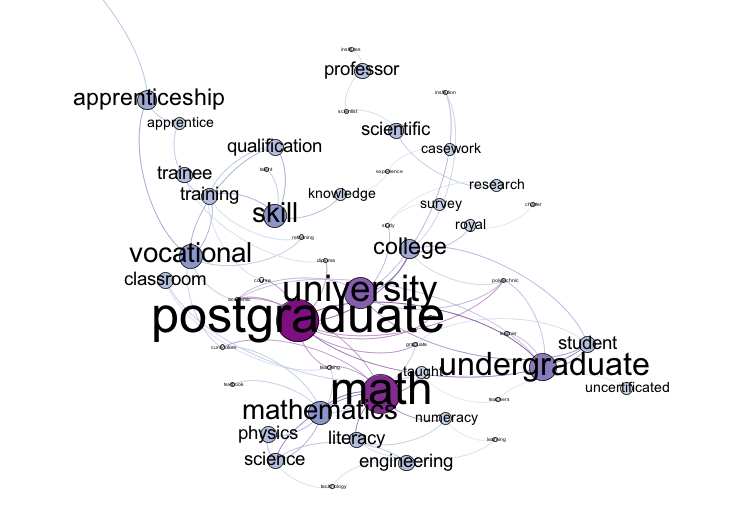

In [14]:
# 주제어와 연관성이 높은 단어 찾기
print(model.wv.most_similar("남해안"))

[('해역', 0.7936552166938782), ('홍합', 0.7690284848213196), ('남해', 0.7419108152389526), ('패류', 0.7364813089370728), ('독소', 0.721811056137085), ('접근', 0.7056840062141418), ('소멸', 0.6992012858390808), ('완도', 0.688318133354187), ('목포', 0.6875084042549133), ('적조', 0.6845794916152954)]
